In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\ADMIN\Downloads\dataset (3).csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# To get mean, max, min, quartiles individually:
mean = df.mean()
maximum = df.max()
minimum = df.min()
quartiles = df.quantile([0.25, 0.5, 0.75])
print("Mean:\n", mean)
print("Maximum:\n", maximum)
print("Minimum:\n", minimum)
print("Quartiles:\n", quartiles)


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [4]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

# Data Visualization

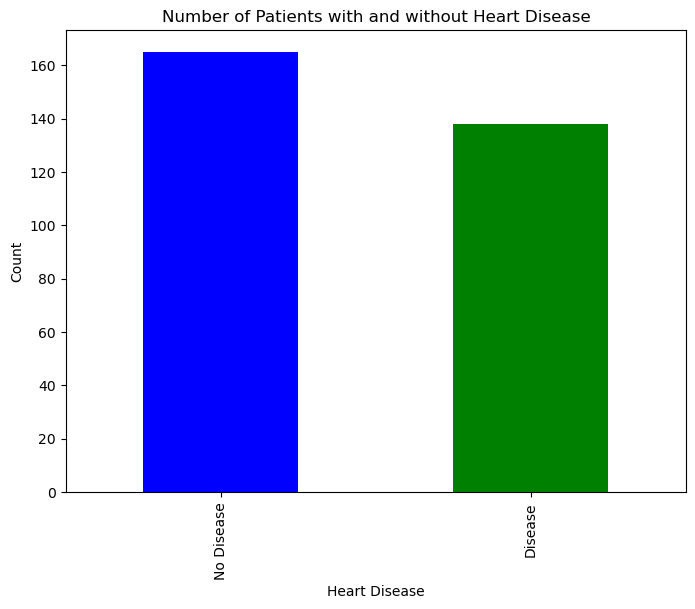

In [5]:
import matplotlib.pyplot as plt

# Assuming 'target' is the column indicating presence (1) or absence (0) of heart disease
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


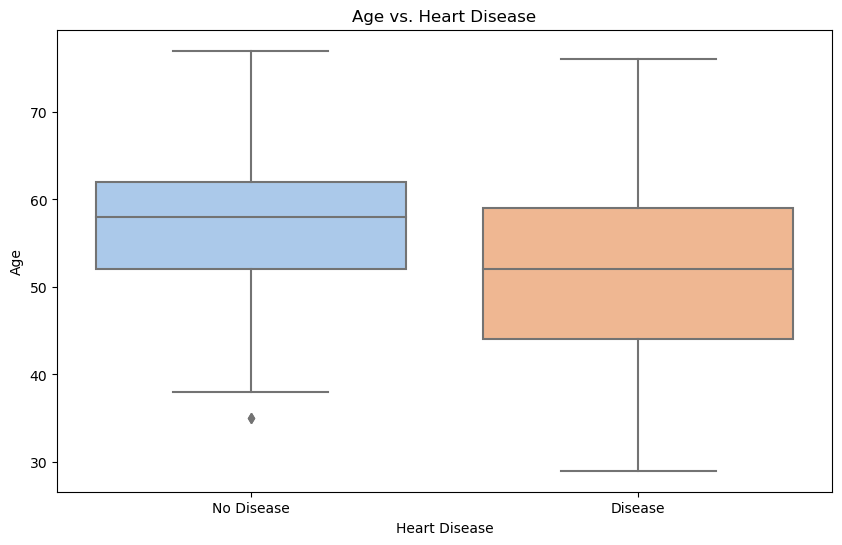

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df, palette='pastel')
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


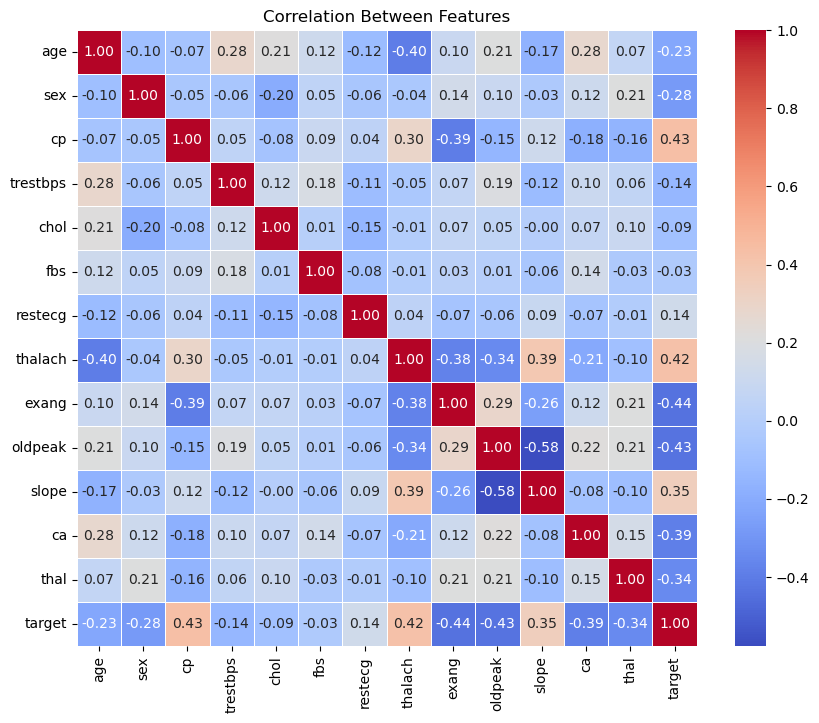

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()


# Model Building

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
col=list(df.columns)

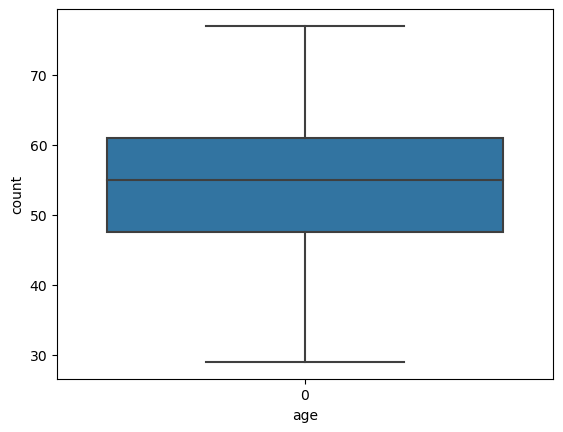

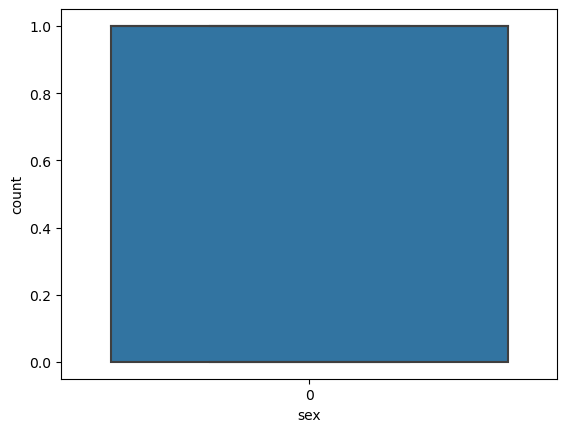

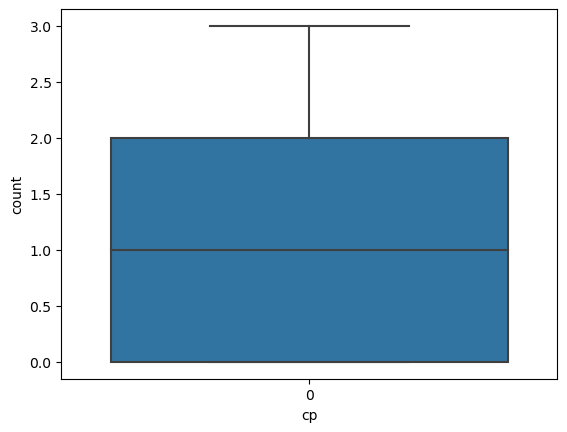

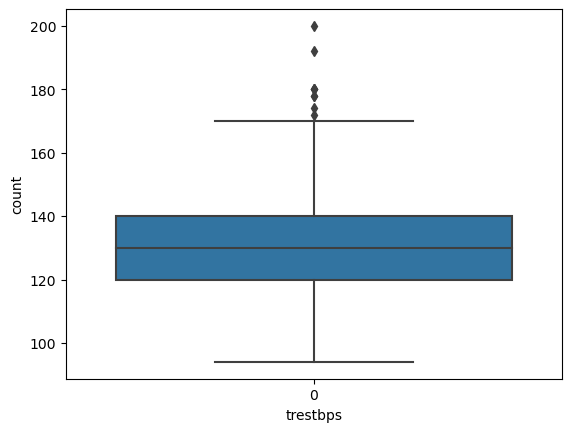

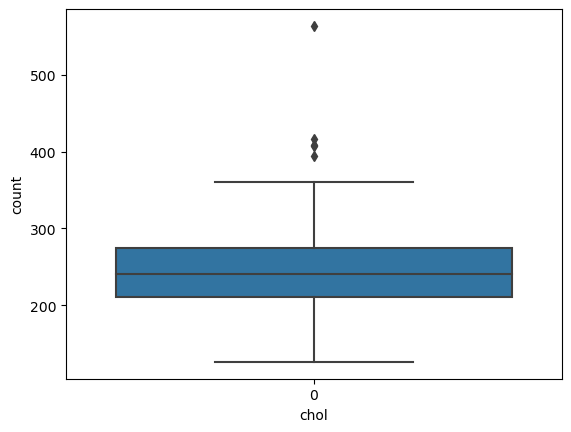

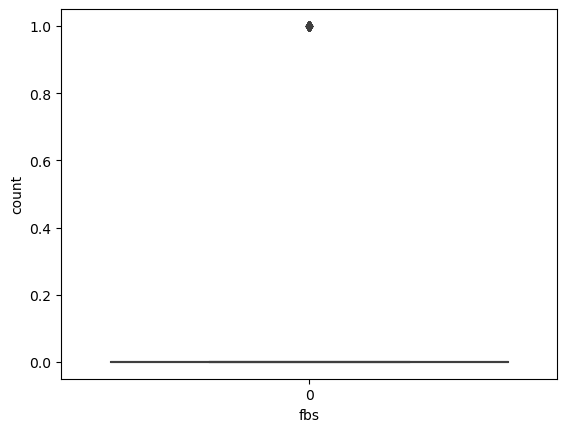

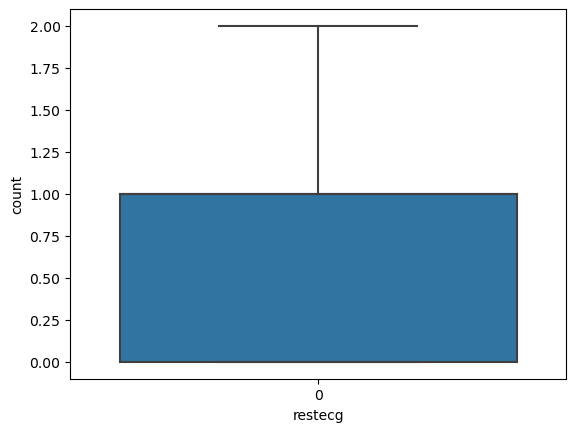

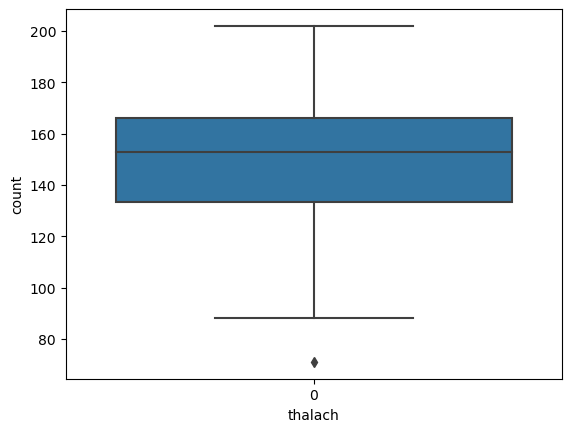

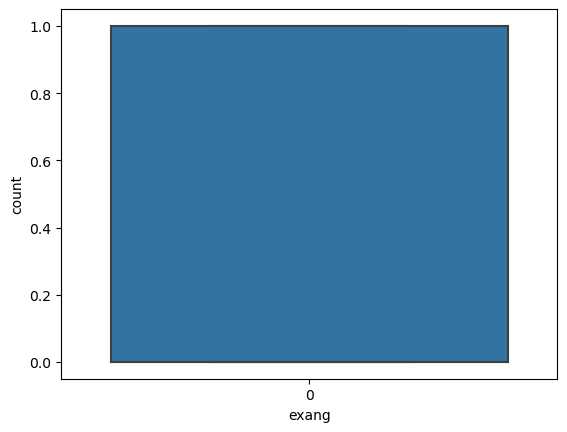

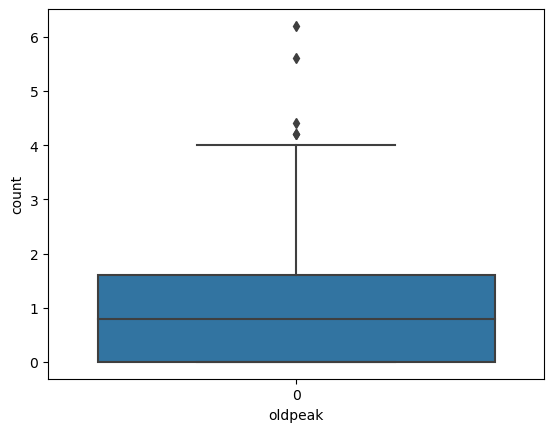

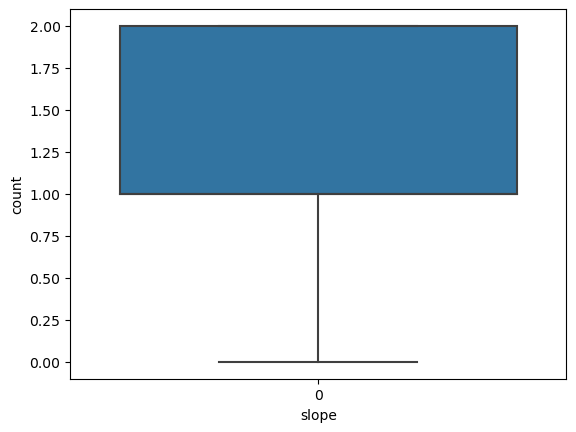

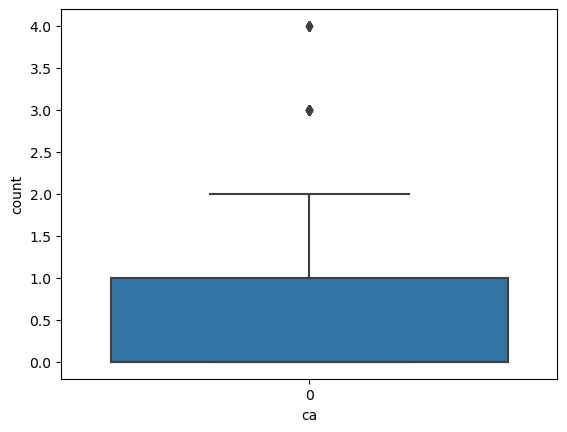

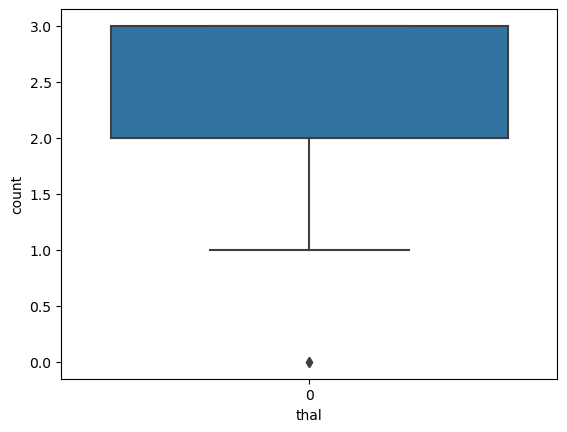

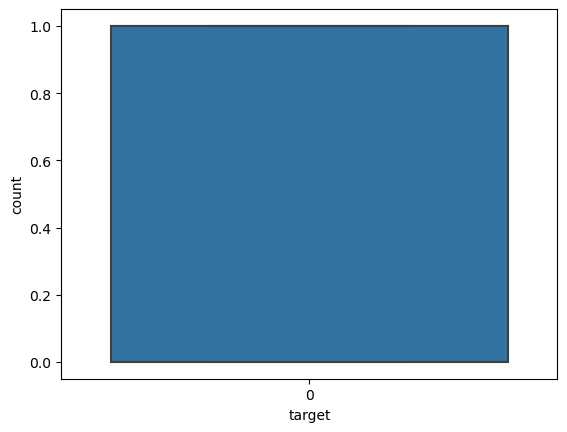

In [11]:
for i in col:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [12]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [13]:
outliers=['trestbps','chol','oldpeak','ca']

In [14]:
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]


In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.shape

(264, 14)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

print(x_test.shape)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

print(x_test.shape)

(184, 13)
(184,)
(80, 13)
(80, 13)


# LogisticRegression

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [24]:
lr.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions=lr.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score, precision_score, f1_score

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [37]:

print(y_test, predictions)

95     1
269    0
1      1
62     1
37     1
      ..
140    1
120    1
38     1
119    1
26     1
Name: target, Length: 80, dtype: int64 [0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 1 1]


In [34]:
print(accuracy_score(predictions,y_test)*100)

83.75


In [33]:
print(confusion_matrix(predictions,y_test))

[[26  5]
 [ 8 41]]


<Axes: >

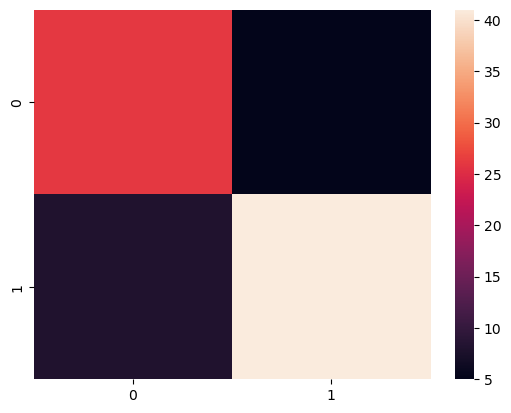

In [38]:
sns.heatmap(confusion_matrix(predictions,y_test))

# DecisionTree

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [40]:
X = df.drop('target', axis=1)
y = df['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [43]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[29  5]
 [13 33]]


In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.775


<Axes: >

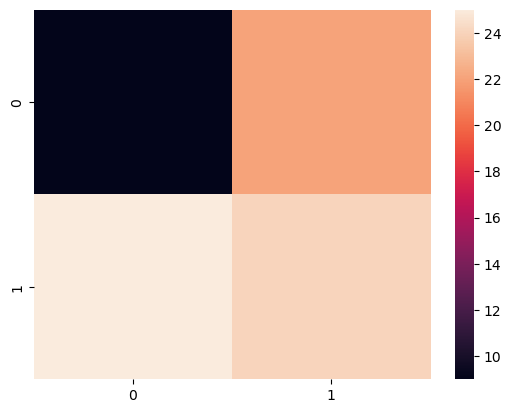

In [51]:
sns.heatmap(confusion_matrix(predictions,y_test))

In [73]:
pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.0 kB ? eta -:--:--
   ---------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [76]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data = export_graphviz(model, out_file=None, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization", format='png', cleanup=True)

# RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [53]:
X = df.drop('target', axis=1)
y = df['target']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[26  8]
 [ 4 42]]


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.85


<Axes: >

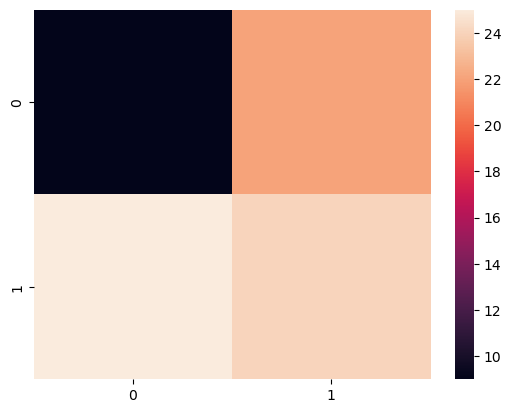

In [59]:
sns.heatmap(confusion_matrix(predictions,y_test))

In [ ]:
estimator = classify.estimators_[0]
dot_data_rf = export_graphviz(estimator, out_file=None, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_visualization", format='png', cleanup=True)